<a href="https://colab.research.google.com/github/ymirandan/projetosPython/blob/main/DS%3A%20Recomendar%20Musicas%20KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 - Contexto:
Recomendar músicas do spotify para usuarios utilizando métodos PCA e Kmeans

#2 - Dicionário dos dados

[Spotify API](https://developer.spotify.com/documentation/web-api)

Acousticness/Acústica: Variável numérica, medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica.

Danceability/Dançabilidade: Variável numérica, a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos dançável e 1,0 é o mais dançável.

Duration_ms:Variável numérica, a duração da trilha em milissegundos.

Duration_min: Variável numérica, a duração da faixa em minutos.

Energy/Energia: Variável numérica, Energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem uma pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

Explicit/Explícito: Variável categórica, se a faixa tem ou não letras explícitas (verdadeiro = sim (1); falso = não(0), não OU desconhecido).

Id: O ID do Spotify para a faixa.

Instrumentalness/Instrumentalidade: Variável numérica, prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente “vocais”. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

Key/Chave:Variável numérica, a chave geral estimada da faixa. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo. 0 = C, 1 = C#/Db, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1.

Liveness/ Ao vivo: Variável numérica, detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

Loudness/ Volume em dB: Variável numérica, volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores típicos variam entre -60 e 0 db.

Mode/ Modo: Variável numérica, o modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

Popularity/Popularidade: Variável numérica, a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções que a faixa teve e quão recentes são essas execuções.

Speechiness/Fala: Variável numérica, a fala detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.

Tempo: Variável numérica, Tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

Valence/Valência: Variável numérica, Medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimida, irritada).

Year/Ano: Ano em que a música foi lançada.

#3 - Importação e Tratamento dos Dados

In [3]:
import pandas as pd
import numpy as np

dados = pd.read_csv('https://raw.githubusercontent.com/sthemonica/music-clustering/main/Dados/Dados_totais.csv')
dados_generos = pd.read_csv('https://raw.githubusercontent.com/sthemonica/music-clustering/main/Dados/data_by_genres.csv')
dados_anos = pd.read_csv('https://raw.githubusercontent.com/sthemonica/music-clustering/main/Dados/data_by_year.csv')


In [4]:
dados.head(2)

valence  year  acousticness   artists  danceability  duration_ms  energy  \
0    0.285  2000       0.00239  Coldplay         0.429       266773   0.661   
1    0.613  2000       0.14300   OutKast         0.843       270507   0.806   

   explicit                      id  instrumentalness  key  liveness  \
0         0  3AJwUDP919kvQ9QcozQPxg          0.000121   11    0.2340   
1         1  0I3q5fE6wg7LIfHGngUTnV          0.000000    4    0.0771   

   loudness  mode         name  popularity  speechiness    tempo  \
0    -7.227     1       Yellow          84       0.0281  173.372   
1    -5.946     0  Ms. Jackson          80       0.2690   94.948   

            artists_song  
0      Coldplay - Yellow  
1  OutKast - Ms. Jackson

In [5]:
dados["year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [6]:
dados.shape

(20311, 19)

In [7]:
dados = dados.drop(["explicit", "key", "mode"], axis=1)
dados.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [8]:
dados_generos.head(2)

mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834    0.3616 -31.514333     0.040567   75.336500   
1  0.450678          0.477762    0.1310 -16.854000     0.076817  120.285667   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5

In [9]:
dados_generos = dados_generos.drop(["key", "mode"], axis=1)
dados_generos.isnull().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [10]:
dados_anos.head(2)


mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1     1  1922      0.938592      0.482042  165469.746479  0.237815   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878   0.20571 -17.048667     0.073662  101.531493  0.379327   
1          0.434195   0.24072 -19.275282     0.116655  100.884521  0.535549   

   popularity  key  
0    0.653333    2  
1    0.140845   10

In [11]:
dados_anos["year"].unique()


array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

In [12]:


dados_anos = dados_anos[dados_anos["year"]>=2000]
dados_anos["year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [13]:


dados_anos = dados_anos.drop(["key", "mode"], axis=1)
dados_anos.reset_index()
dados_anos.isna().sum()


year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

# 4 - Análise Gráfica

In [14]:
import plotly.express as px
import plotly.graph_objects as go


In [15]:
fig = px.line(dados_anos, x="year", y="loudness", markers= True, title='Variação do loudness conforme os anos')
fig.show()

In [16]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['acousticness'],
                    name='Acousticness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['valence'],
                    name='Valence'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['danceability'],
                    name='Danceability'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['energy'],
                    name='Energy'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['instrumentalness'],
                    name='Instrumentalness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['liveness'],
                    name='Liveness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['speechiness'],
                    name='Speechiness'))

fig.show()

In [17]:

fig = px.imshow(dados.corr(), text_auto=True)
fig.show()

<ipython-input-17-fa7b692f5384>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



# 5 - Clusterização por Gênero

#5.1 - PCA e StandardScaler

In [18]:
dados_generos.head()

genres  acousticness  danceability   duration_ms    energy  \
0  21st century classical      0.979333      0.162883  1.602977e+05  0.071317   
1                   432hz      0.494780      0.299333  1.048887e+06  0.450678   
2                   8-bit      0.762000      0.712000  1.151770e+05  0.818000   
3                      []      0.651417      0.529093  2.328809e+05  0.419146   
4              a cappella      0.676557      0.538961  1.906285e+05  0.316434   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.606834  0.361600 -31.514333     0.040567   75.336500  0.103783   
1          0.477762  0.131000 -16.854000     0.076817  120.285667  0.221750   
2          0.876000  0.126000  -9.180000     0.047000  133.444000  0.975000   
3          0.205309  0.218696 -12.288965     0.107872  112.857352  0.513604   
4          0.003003  0.172254 -12.479387     0.082851  112.110362  0.448249   

   popularity  
0   27.833333  
1   52.500000  
2   48.000000  
3   20.859882  
4   45.820071

In [19]:
dados_generos['genres'].value_counts().sum()


2973

In [20]:
dados_generos1 = dados_generos.drop('genres', axis=1)


Agora vamos utilizar vários conceitos em um processo de pipeline, então a primeira coisa que vamos fazer é importar o método Pipeline do sklearn.pipeline e esse método faz literalmente uma pipeline de machine learning, mas de uma forma automática, onde aplica sequencialmente uma lista de transformações até um resultado final. Então o que precisamos passar é o que a nossa pipeline vai fazer, como o primeiro passo e o que queremos de resultado final dela.

Neste ponto precisamos reduzir a dimensionalidade da tabela que está com várias colunas, porém se utilizarmos um processo de redução diretamente, sem fazer a padronização dos dados na parte de pré processamento, os resultados ficarão totalmente desbalanceados, trazendo maior peso para as variáveis que têm uma amplitude maior, como por exemplo o loudness em relação às outras variáveis que compõem a música.

Para resolver esse problema, o primeiro passo da pipeline vai ser usar o StandardScaler para trazer essa padronização e redução de escala para que no próximo passo seja feita a redução de dimensionalidade com um método de decomposição, no nosso caso vamos escolher o PCA.

PCA significa Análise de componentes principais e ele trás consigo uma série de análises matemáticas que são feitas para que possamos transformar aquelas milhares de colunas que temos em uma quantidade menor, com um valor n que escolhermos, porém, quanto mais colunas a gente tem no dataset original e menos colunas queremos no dataset final, o aprendizado depois pode ser prejudicado.

Na parte n_components podemos colocar a quantidade de % de explicação que queremos que o algoritmo tenha no final, como por exemplo 0.3, que seria 30%, ou um valor como por exemplo um valor X de colunas.

Depois de feita a pipeline, vamos salvar em um arquivo chamado projection, com as colunas x e y, que são as posições dos pontos na cluster.

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [22]:
SEED = 1224
np.random.seed(1224)

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2, random_state=SEED))])

In [23]:
genre_embedding_pca = pca_pipeline.fit_transform(dados_generos1)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding_pca)
projection

x         y
0     5.910268 -0.011146
1     2.787093  4.498483
2    -0.757538 -1.258495
3     1.020521 -0.931690
4     0.753911 -0.999861
...        ...       ...
2968 -0.475136 -0.017126
2969 -3.026756 -1.304983
2970 -0.832511 -1.089726
2971  1.774790 -3.695233
2972 -1.028069 -1.390709

[2973 rows x 2 columns]

#5.2 K-Means


In [24]:
from sklearn.cluster import KMeans


In [25]:
kmeans_pca = KMeans(n_clusters=5, verbose=True, random_state=SEED)

kmeans_pca.fit(projection)

dados_generos['cluster_pca'] = kmeans_pca.predict(projection)
projection['cluster_pca'] = kmeans_pca.predict(projection)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Initialization complete
Iteration 0, inertia 4523.567815543696.
Iteration 1, inertia 3668.9855521560244.
Iteration 2, inertia 3624.7309257118204.
Iteration 3, inertia 3602.4958137588187.
Iteration 4, inertia 3588.0607912404857.
Iteration 5, inertia 3575.439570259302.
Iteration 6, inertia 3566.3761311630205.
Iteration 7, inertia 3562.591728457493.
Iteration 8, inertia 3560.314467700935.
Iteration 9, inertia 3558.885495152649.
Iteration 10, inertia 3558.002748934052.
Iteration 11, inertia 3557.7295547754898.
Converged at iteration 11: center shift 9.319981044865494e-05 within tolerance 0.00027098868470996505.
Initialization complete
Iteration 0, inertia 3650.5166847646487.
Iteration 1, inertia 3552.891536564816.
Iteration 2, inertia 3528.942542123225.
Iteration 3, inertia 3518.849132048712.
Iteration 4, inertia 3512.6717916139805.
Iteration 5, inertia 3509.1741078247464.
Iteration 6, inertia 3506.3883335513747.
Iteration 7, inertia 3505.0910743094128.
Iteration 8, inertia 3504.6465117384

In [26]:
projection


x         y  cluster_pca
0     5.910268 -0.011146            3
1     2.787093  4.498483            3
2    -0.757538 -1.258495            4
3     1.020521 -0.931690            1
4     0.753911 -0.999861            1
...        ...       ...          ...
2968 -0.475136 -0.017126            2
2969 -3.026756 -1.304983            4
2970 -0.832511 -1.089726            4
2971  1.774790 -3.695233            1
2972 -1.028069 -1.390709            4

[2973 rows x 3 columns]

In [27]:
projection['generos'] = dados_generos['genres']
projection

x         y  cluster_pca                 generos
0     5.910268 -0.011146            3  21st century classical
1     2.787093  4.498483            3                   432hz
2    -0.757538 -1.258495            4                   8-bit
3     1.020521 -0.931690            1                      []
4     0.753911 -0.999861            1              a cappella
...        ...       ...          ...                     ...
2968 -0.475136 -0.017126            2                    zolo
2969 -3.026756 -1.304983            4                 zouglou
2970 -0.832511 -1.089726            4                    zouk
2971  1.774790 -3.695233            1            zurich indie
2972 -1.028069 -1.390709            4                  zydeco

[2973 rows x 4 columns]

#5.3 Plotando o clustering

In [28]:

fig = px.scatter(
   projection, x='x', y='y', color='cluster_pca', hover_data=['x', 'y', 'generos'])
fig.show()

In [29]:
pca_pipeline[1].explained_variance_ratio_.sum()


0.49270669947266443

In [30]:
pca_pipeline[1].explained_variance_.sum()


5.421597305805701

#6 - Clusterização por Música

#6.1 - Redução de Dimensionalidade com PCA

In [31]:
dados.head()


valence  year  acousticness       artists  danceability  duration_ms  \
0    0.285  2000       0.00239      Coldplay         0.429       266773   
1    0.613  2000       0.14300       OutKast         0.843       270507   
2    0.400  2000       0.00958   Linkin Park         0.556       216880   
3    0.543  2000       0.00664  3 Doors Down         0.545       233933   
4    0.760  2000       0.03020        Eminem         0.949       284200   

   energy                      id  instrumentalness  liveness  loudness  \
0   0.661  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227   
1   0.806  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946   
2   0.864  60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870   
3   0.865  6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708   
4   0.661  3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244   

                  name  popularity  speechiness    tempo  \
0               Yellow          84       0.0281  173.372   
1          Ms. Jackson          80       0.2690   94.948   
2           In the End          84       0.0584  105.143   
3           Kryptonite          78       0.0286   99.009   
4  The Real Slim Shady          80       0.0572  104.504   

                   artists_song  
0             Coldplay - Yellow  
1         OutKast - Ms. Jackson  
2      Linkin Park - In the End  
3     3 Doors Down - Kryptonite  
4  Eminem - The Real Slim Shady

In [32]:
dados['artists'].value_counts()


Drake                   170
Taylor Swift            156
Eminem                  147
Kanye West              136
BTS                     122
                       ... 
Of Monsters and Men       7
The Living Tombstone      7
Clean Bandit              7
Nelly Furtado             6
Empire of the Sun         6
Name: artists, Length: 875, dtype: int64

In [33]:
dados['artists_song'].value_counts()


Coldplay - Yellow                                                   1
Juice WRLD - Intro                                                  1
Carrie Underwood - The Champion - Bonus Track                       1
YoungBoy Never Broke Again - Cross Me (feat. Lil Baby and Plies)    1
Twenty One Pilots - Morph                                           1
                                                                   ..
Taylor Swift - Come Back...Be Here                                  1
Banda El Recodo - Me Gusta Todo De Ti                               1
Michael Bublé - The Christmas Song                                  1
Glee Cast - Smooth Criminal (Glee Cast Version) (feat. 2CELLOS)     1
Eminem - Darkness                                                   1
Name: artists_song, Length: 20311, dtype: int64

In [34]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(dtype=int)
colunas_ohe = ohe.fit_transform(dados[['artists']]).toarray()
dados2 = dados.drop('artists', axis=1)

dados_musicas_dummies = pd.concat([dados2, pd.DataFrame(colunas_ohe, columns=ohe.get_feature_names_out(['artists']))], axis=1)
dados_musicas_dummies

valence  year  acousticness  danceability  duration_ms  energy  \
0        0.285  2000       0.00239         0.429       266773   0.661   
1        0.613  2000       0.14300         0.843       270507   0.806   
2        0.400  2000       0.00958         0.556       216880   0.864   
3        0.543  2000       0.00664         0.545       233933   0.865   
4        0.760  2000       0.03020         0.949       284200   0.661   
...        ...   ...           ...           ...          ...     ...   
20306    0.187  2020       0.57400         0.445       176250   0.330   
20307    0.240  2020       0.81500         0.467       179188   0.429   
20308    0.466  2020       0.31000         0.562       253613   0.686   
20309    0.522  2020       0.20400         0.598       230600   0.472   
20310    0.195  2020       0.00998         0.671       337147   0.623   

                           id  instrumentalness  liveness  loudness  ...  \
0      3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227  ...   
1      0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946  ...   
2      60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870  ...   
3      6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708  ...   
4      3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244  ...   
...                       ...               ...       ...       ...  ...   
20306  0PUkanqCGTb6qseXPKOw1F          0.000000    0.1020    -8.121  ...   
20307  6Iw6fQVKZi0fWtEQBrTFcP          0.000052    0.1770    -8.689  ...   
20308  308prODCCD0O660tIktbUi          0.022500    0.1250    -8.480  ...   
20309  2f8y4CuG57UJEmkG3ujd0D          0.000015    0.1080   -10.991  ...   
20310  5SiZJoLXp3WOl3J4C8IK0d          0.000008    0.6430    -7.161  ...   

      artists_Zara Larsson  artists_Zedd  artists_alt-J  artists_blackbear  \
0                        0             0              0                  0   
1                        0             0              0                  0   
2                        0             0              0                  0   
3                        0             0              0                  0   
4                        0             0              0                  0   
...                    ...           ...            ...                ...   
20306                    0             0              0                  0   
20307                    0             0              0                  0   
20308                    0             0              0                  0   
20309                    0             0              0                  0   
20310                    0             0              0                  0   

      artists_blink-182  artists_deadmau5  artists_for KING & COUNTRY  \
0                     0                 0                           0   
1                     0                 0                           0   
2                     0                 0                           0   
3                     0                 0                           0   
4                     0                 0                           0   
...                 ...               ...                         ...   
20306                 0                 0                           0   
20307                 0                 0                           0   
20308                 0                 0                           0   
20309                 0                 0                           0   
20310                 0                 0                           0   

       artists_fun.  artists_girl in red  artists_iann dior  
0                 0                    0                  0  
1                 0                    0                  0  
2                 0                    0                  0  
3                 0                    0                  0  
4                 0                    0                  0  
...             ...            

In [35]:
dados.shape


(20311, 16)

In [36]:
dados_musicas_dummies.shape


(20311, 890)

In [37]:
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=0.7, random_state=SEED))])


music_embedding_pca = pca_pipeline.fit_transform(dados_musicas_dummies.drop(['id','name','artists_song'], axis=1))
projection_m = pd.DataFrame(data=music_embedding_pca)

In [38]:
pca_pipeline[1].n_components_


612

#6.2 Aplicação do cluster com K-Means


In [39]:
kmeans_pca_pipeline = KMeans(n_clusters=50, verbose=False, random_state=SEED)

kmeans_pca_pipeline.fit(projection_m)

dados['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)
projection_m['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 


In [40]:
projection_m['artist'] = dados['artists']
projection_m['song'] = dados['artists_song']
projection_m


0         1         2         3         4         5         6  \
0      0.174796  0.731252  2.186797 -0.767192  0.594847  0.315968 -0.412322   
1     -1.358420  0.052935 -1.789973  1.938444  0.403606  1.023898 -1.172118   
2     -0.972077  0.658094  0.757500 -0.277350 -0.400393  0.402941  1.292960   
3     -0.926464  1.292091  0.398499 -0.997738  0.202219  0.620859 -0.527689   
4     -1.710077 -0.383502 -1.258562  1.346428  1.223591  1.744579  0.094311   
...         ...       ...       ...       ...       ...       ...       ...   
20306  1.346699 -2.775889  0.986755 -1.704967  0.103935 -0.726582  0.253808   
20307  1.269387 -2.444619  0.971408 -0.115303 -0.719597 -1.823579 -0.545186   
20308  0.781916 -1.164865  0.705256 -0.947160  1.145828 -0.472667 -0.356604   
20309  0.002454 -3.056407 -0.272934  1.436355 -0.604453  0.251492 -1.361710   
20310 -0.957008 -1.208016  1.103144  4.128170  1.026126  0.085505  1.588383   

              7         8         9  ...       605       606       607  \
0     -0.479171 -2.700668  2.109956  ... -0.009111  0.005154 -0.034027   
1      0.821698 -1.716897  0.252498  ... -0.031986  0.029708 -0.016322   
2      1.839192 -1.562236  1.410677  ...  0.017097  0.017361 -0.010979   
3      1.135529 -1.343893  1.020964  ...  0.089337  0.164777 -0.064148   
4      0.479412 -2.125376  0.389565  ... -0.011937 -0.004081 -0.017478   
...         ...       ...       ...  ...       ...       ...       ...   
20306  0.520234 -0.064513  0.204971  ... -0.235355 -0.054256  0.016922   
20307 -1.475719 -0.338390  0.272129  ... -0.183026  0.074605  0.005622   
20308  0.972512  0.900317 -0.674016  ... -0.033420 -0.157564  0.213849   
20309 -0.633245  0.280076  0.521145  ... -0.784640  0.080684  0.038379   
20310  0.567041 -1.026283  0.266124  ... -0.012069 -0.003818 -0.017675   

            608           609           610           611  cluster_pca  \
0     -0.032617  2.241192e-11  1.202033e-13  3.177821e-12            5   
1     -0.030234 -2.395758e-12  2.291641e-13 -1.187264e-12           12   
2     -0.012781  4.273933e-12 -6.407207e-13 -1.958694e-13           20   
3     -0.040911  5.152080e-11 -7.249490e-13  1.084807e-11           12   
4     -0.010033  2.254040e-12  1.683896e-13  8.389616e-13           12   
...         ...           ...           ...           ...          ...   
20306 -0.125947  4.217717e-11 -4.175589e-13  5.457610e-11           30   
20307  0.000054  4.323403e-11  1.154738e-11  9.481307e-12           30   
20308 -0.065180 -2.580928e-11  9.953739e-12  4.430351e-11           30   
20309  0.108493  5.473520e-11  1.333316e-11  1.185832e-11           30   
20310 -0.010372  2.372825e-12  1.582875e-13  8.373194e-13           30   

              artist                                song  
0           Coldplay                   Coldplay - Yellow  
1            OutKast               OutKast - Ms. Jackson  
2        Linkin Park            Linkin Park - In the End  
3       3 Doors Down           3 Doors Down - Kryptonite  
4             Eminem        Eminem - The Real Slim Shady  
...              ...                                 ...  
20306          Bazzi      Bazzi - I Don't Think I'm Okay  
20307  Bryson Tiller  Bryson Tiller - Timeless Interlude  
20308    Fleet Foxes              Fleet Foxes - Sunblind  
20309          Gunna      Gunna - NASTY GIRL / ON CAMERA  
20310         Eminem                   Eminem - Darkness  

[20311 rows x 615 columns]

#6.3 Analisando o Cluster

In [41]:
fig = px.scatter(
   projection_m, x=0, y=1, color='cluster_pca', hover_data=[0, 1, 'song'])
fig.show()

In [42]:
pca_pipeline[1].explained_variance_ratio_.sum()


0.7000008463187031

In [43]:
pca_pipeline[1].explained_variance_.sum()


620.9313218688688

#7 - Sistemas de Recomendação

#7.1 - Recomendação da música


In [44]:
nome_musica = 'Ed Sheeran - Shape of You'


In [45]:
from pandas.core.dtypes.cast import maybe_upcast
from sklearn.metrics.pairwise import euclidean_distances

cluster = list(projection_m[projection_m['song']== nome_musica]['cluster_pca'])[0]
musicas_recomendadas = projection_m[projection_m['cluster_pca']== cluster][[0, 1, 'song']]
x_musica = list(projection_m[projection_m['song']== nome_musica][0])[0]
y_musica = list(projection_m[projection_m['song']== nome_musica][1])[0]

#distâncias euclidianas
distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])
musicas_recomendadas['id'] = dados['id']
musicas_recomendadas['distancias']= distancias
recomendada = musicas_recomendadas.sort_values('distancias').head(10)
recomendada

0         1                                               song  \
2463  -0.826954 -2.939691                          Ed Sheeran - Shape of You   
13421 -0.826575 -2.915302                    $uicideBoy$ - For the Last Time   
2942  -0.863727 -2.965997                 Marshmello - Be Kind (with Halsey)   
5371  -0.874338 -2.927113            The Kid LAROI - WRONG (feat. Lil Mosey)   
13682 -0.878031 -2.944654    YoungBoy Never Broke Again - House Arrest Tingz   
15392 -0.792012 -2.987829                         $uicideBoy$ - Putrid Pride   
15388 -0.784530 -2.897926    Pop Smoke - Paranoia (feat. Gunna & Young Thug)   
5271  -0.789801 -2.986457  Ed Sheeran - South of the Border (feat. Camila...   
18479 -0.904140 -2.933036                                    21 Savage - 1.5   
2660  -0.869469 -3.011060                        Tyga - Taste (feat. Offset)   

                           id  distancias  
2463   7qiZfU4dY1lWllzX7mPBI3    0.000000  
13421  240audWazVjwvwh7XwfSZE    0.024393  
2942   3Z8FwOEN59mRMxDCtb8N0A    0.045213  
5371   1EWkw4Fa6IlnsAihLUlFFM    0.049025  
13682  4Boj4bBiDv6Ur1zKEvLXBI    0.051317  
15392  4CwA4CdTQqNv18QSAW3Srk    0.059483  
15388  3QqJ44HiM84iyZS0G2IKIP    0.059533  
5271   4vUmTMuQqjdnvlZmAH61Qk    0.059728  
18479  2wOXxtHZgRkkrkEbKLzzqs    0.077472  
2660   5IaHrVsrferBYDm0bDyABy    0.083072

#7.2 - Biblioteca Spotipy


In [46]:
!pip install spotipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 kB 7.8 MB/s eta 0:00:00


In [47]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials

ATENÇÃO!

Antes de rodar essa parte do código, você precisa fazer uma conta na [API do Spotify](https://developer.spotify.com/documentation/web-api) e gerar suas próprias client_id e client_secret (ir em dashboard, criar app, e pegar informações em settings/configurações)

In [58]:
scope = "user-library-read playlist-modify-private"
OAuth = SpotifyOAuth(
        scope=scope,
        redirect_uri='https://github.com/ymirandan/projetosPython',
        client_id = 'ec1cd747688849e0bf96c7940224c458',
        client_secret = '7869b4eb7ab54b28a7b6afd32dac826e')

In [59]:
client_credentials_manager = SpotifyClientCredentials(client_id = 'ec1cd747688849e0bf96c7940224c458',client_secret = '7869b4eb7ab54b28a7b6afd32dac826e')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)


#7.3 - Imagem do álbum

In [60]:
dados.head(1)


valence  year  acousticness   artists  danceability  duration_ms  energy  \
0    0.285  2000       0.00239  Coldplay         0.429       266773   0.661   

                       id  instrumentalness  liveness  loudness    name  \
0  3AJwUDP919kvQ9QcozQPxg          0.000121     0.234    -7.227  Yellow   

   popularity  speechiness    tempo       artists_song  cluster_pca  
0          84       0.0281  173.372  Coldplay - Yellow            5

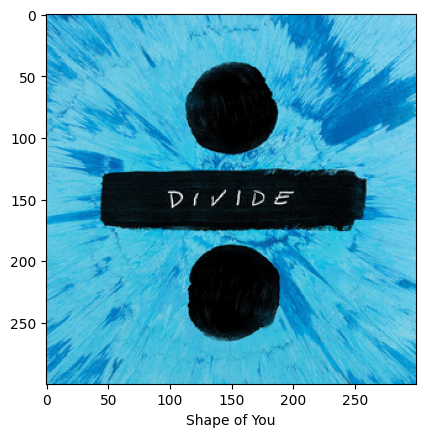

In [61]:
import matplotlib.pyplot as plt
from skimage import io

#achando o ID
nome_musica = 'Ed Sheeran - Shape of You'
id = dados[dados['artists_song']== nome_musica]['id'].iloc[0]

# na API
track = sp.track(id)
url = track["album"]["images"][1]["url"]
name = track["name"]

# Mexendo com a imagem
image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize = 10)
plt.show()


# 7.4 - Buscando os dados da playlist

In [62]:
def recommend_id(playlist_id):
  url = []
  name = []
  for i in playlist_id:
        track = sp.track(i)
        url.append(track["album"]["images"][1]["url"])
        name.append(track["name"])
  return name, url

In [63]:
name, url = recommend_id(recomendada['id'])


#7.5 - Gerando as imagens da playlist


In [64]:
def visualize_songs(name, url):

    plt.figure(figsize=(15,10))
    columns = 5

    for i, u in enumerate(url):
        # define o ax como o subplot, com a divisão que retorna inteiro do número urls pelas colunas + 1 (no caso, 6)
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)

        # Lendo a imagem com o Scikit Image
        image = io.imread(u)

        # Mostra a imagem
        plt.imshow(image)

        # Para deixar o eixo Y invisível
        ax.get_yaxis().set_visible(False)

        # xticks define o local que vamos trocar os rótulos do eixo x, nesse caso, deixar os pontos de marcação brancos
        plt.xticks(color = 'w', fontsize = 0.1)

        # yticks define o local que vamos trocar os rótulos do eixo y, nesse caso, deixar os pontos de marcação brancos
        plt.yticks(color = 'w', fontsize = 0.1)

        # Colocando o nome da música no eixo x
        plt.xlabel(name[i], fontsize = 8)

        # Faz com que todos os parâmetros se encaixem no tamanho da imagem definido
        plt.tight_layout(h_pad=0.7, w_pad=0)

        # Ajusta os parâmetros de layout da imagem.
        # wspace = A largura do preenchimento entre subparcelas, como uma fração da largura média dos eixos.
        # hspace = A altura do preenchimento entre subparcelas, como uma fração da altura média dos eixos.
        plt.subplots_adjust(wspace=None, hspace=None)

        # Remove os ticks - marcadores, do eixo x, sem remover o eixo todo, deixando o nome da música.
        plt.tick_params(bottom = False)

        # Tirar a grade da imagem, gerada automaticamente pelo matplotlib
        plt.grid(visible=None)
    plt.show()

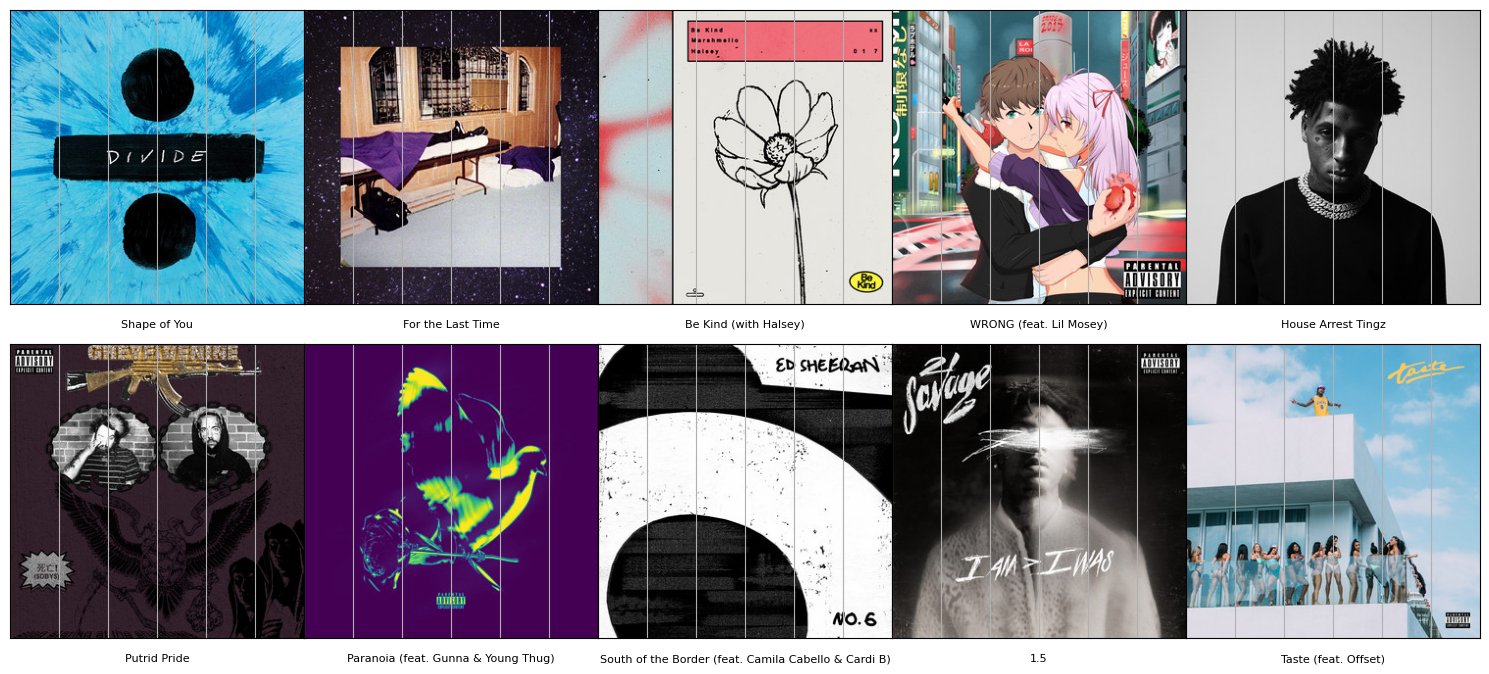

In [65]:
visualize_songs(name, url)


# 7.6 Fazendo uma função final


In [66]:
def recomendador(nome_musica):

## Calculando as distâncias
  cluster = list(projection_m[projection_m['song']== nome_musica]['cluster_pca'])[0]
  musicas_recomendadas = projection_m[projection_m['cluster_pca']== cluster][[0, 1, 'song']]
  x_musica = list(projection_m[projection_m['song']== nome_musica][0])[0]
  y_musica = list(projection_m[projection_m['song']== nome_musica][1])[0]
  distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])
  musicas_recomendadas['id'] = dados['id']
  musicas_recomendadas['distancias'] = distancias
  recomendada = musicas_recomendadas.sort_values('distancias').head(10)

  # ## Acessando os dados de cada música com a biblioteca Spotipy (nome e imagem)
  playlist_id = recomendada['id']

  url = []
  name = []
  for i in playlist_id:
      track = sp.track(i)
      url.append(track["album"]["images"][1]["url"])
      name.append(track["name"])

# ## Plotando as figuras
  plt.figure(figsize=(15,10))
  columns = 5
  for i, u in enumerate(url):
      ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
      image = io.imread(u)
      plt.imshow(image)
      ax.get_yaxis().set_visible(False)
      plt.xticks(color = 'w', fontsize = 0.1)
      plt.yticks(color = 'w', fontsize = 0.1)
      plt.xlabel(name[i], fontsize = 10)
      plt.tight_layout(h_pad=0.7, w_pad=0)
      plt.subplots_adjust(wspace=None, hspace=None)
      plt.grid(visible=None)
      plt.tick_params(bottom = False)
  plt.show()

#8 - Resultado Recomendados

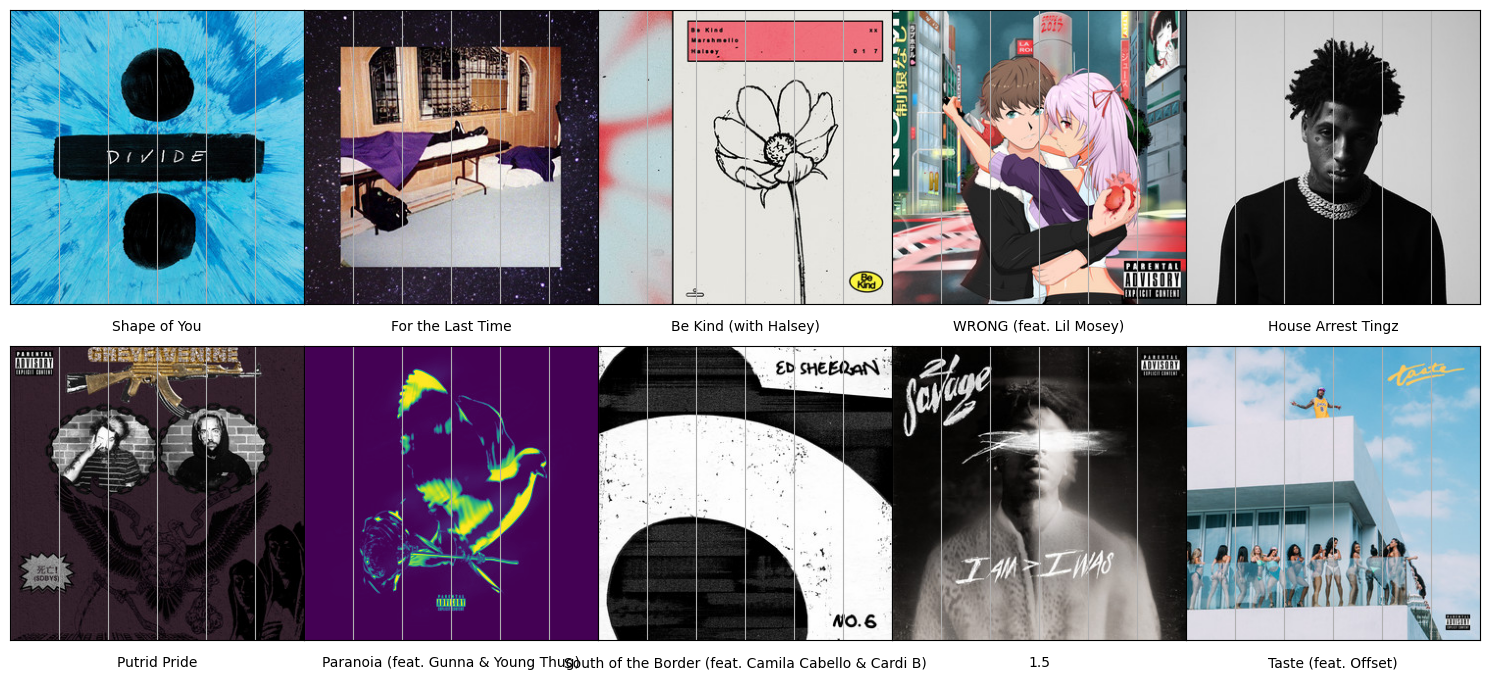

In [67]:
recomendador('Ed Sheeran - Shape of You')


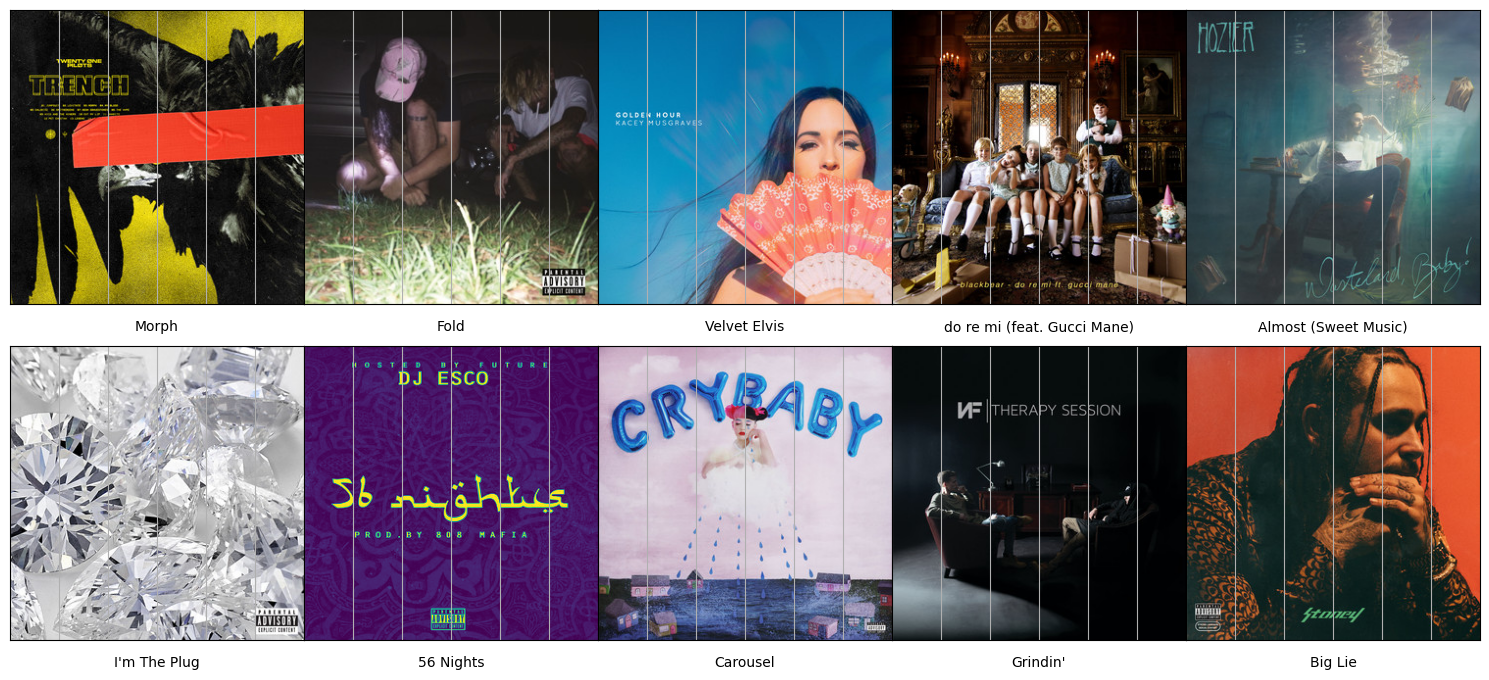

In [72]:
recomendador('Twenty One Pilots - Morph')


Observação: na variável *artists_song* vemos as opções de artista e musica que podem ser usadas como referencias na função. o algoritmo irá encontrar musicas parecidas com essa e recomendá-las

In [73]:
dados['artists_song']

0                         Coldplay - Yellow
1                     OutKast - Ms. Jackson
2                  Linkin Park - In the End
3                 3 Doors Down - Kryptonite
4              Eminem - The Real Slim Shady
                        ...                
20306        Bazzi - I Don't Think I'm Okay
20307    Bryson Tiller - Timeless Interlude
20308                Fleet Foxes - Sunblind
20309        Gunna - NASTY GIRL / ON CAMERA
20310                     Eminem - Darkness
Name: artists_song, Length: 20311, dtype: object